In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

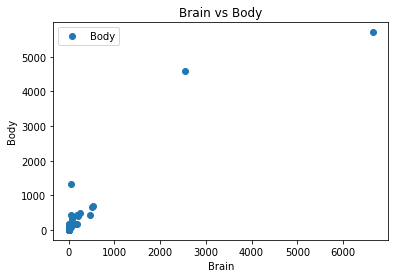

In [ ]:
df.plot(x="Brain",y="Body",style='o')
plt.title("Brain vs Body")
plt.xlabel("Brain")
plt.ylabel("Body")
plt.show()

In [ ]:
df["Brain"].unique()

array([3.385e+00, 4.800e-01, 1.350e+00, 4.650e+02, 3.633e+01, 2.766e+01,
       1.483e+01, 1.040e+00, 4.190e+00, 4.250e-01, 1.010e-01, 9.200e-01,
       1.000e+00, 5.000e-03, 6.000e-02, 3.500e+00, 2.000e+00, 1.700e+00,
       2.547e+03, 2.300e-02, 1.871e+02, 5.210e+02, 7.850e-01, 1.000e+01,
       3.300e+00, 2.000e-01, 1.410e+00, 5.290e+02, 2.070e+02, 8.500e+01,
       7.500e-01, 6.200e+01, 6.654e+03, 6.800e+00, 3.500e+01, 4.050e+00,
       1.200e-01, 1.000e-02, 1.400e+00, 2.500e+02, 2.500e+00, 5.550e+01,
       1.000e+02, 5.216e+01, 1.055e+01, 5.500e-01, 6.000e+01, 3.600e+00,
       4.288e+00, 2.800e-01, 7.500e-02, 1.220e-01, 4.800e-02, 1.920e+02,
       3.000e+00, 1.600e+02, 9.000e-01, 1.620e+00, 1.040e-01, 4.235e+00])

In [ ]:
df["Body"].unique()

array([4.450e+01, 1.550e+01, 8.100e+00, 4.230e+02, 1.195e+02, 1.150e+02,
       9.820e+01, 5.500e+00, 5.800e+01, 6.400e+00, 4.000e+00, 5.700e+00,
       6.600e+00, 1.400e-01, 1.000e+00, 1.080e+01, 1.230e+01, 6.300e+00,
       4.603e+03, 3.000e-01, 4.190e+02, 6.550e+02, 3.500e+00, 2.560e+01,
       5.000e+00, 1.750e+01, 6.800e+02, 4.060e+02, 3.250e+02, 1.320e+03,
       5.712e+03, 3.900e+00, 1.790e+02, 5.600e+01, 1.700e+01, 4.000e-01,
       2.500e-01, 1.250e+01, 4.900e+02, 1.210e+01, 1.750e+02, 1.570e+02,
       4.400e+02, 1.795e+02, 2.400e+00, 8.100e+01, 2.100e+01, 3.920e+01,
       1.900e+00, 1.200e+00, 3.000e+00, 3.300e-01, 1.800e+02, 2.500e+01,
       1.690e+02, 2.600e+00, 1.140e+01, 2.500e+00, 5.040e+01])

{'boxes': [<matplotlib.lines.Line2D at 0x7f335024f3d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f33502553d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f33501df410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3350255e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f335024f910>,
  <matplotlib.lines.Line2D at 0x7f335024fe50>]}

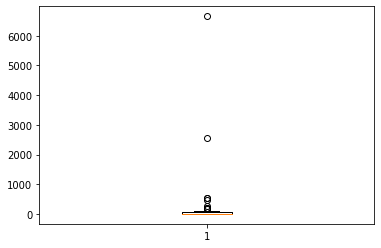

In [ ]:
plt.boxplot(df["Brain"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f33501c8850>],
 'caps': [<matplotlib.lines.Line2D at 0x7f33501cd890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f33501d48d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f33501d4390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f33501c8dd0>,
  <matplotlib.lines.Line2D at 0x7f33501cd350>]}

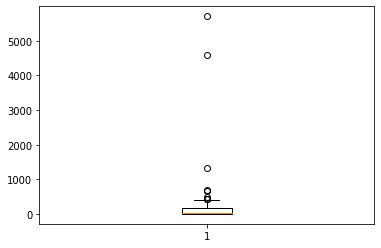

In [ ]:
plt.boxplot(df["Body"])

In [ ]:
df.drop(df[df['Brain'] >= df["Body"]].index, inplace = True)


In [ ]:
df.drop(df[df['Brain'] >= 2400].index, inplace = True)

In [ ]:
df.shape

(59, 2)

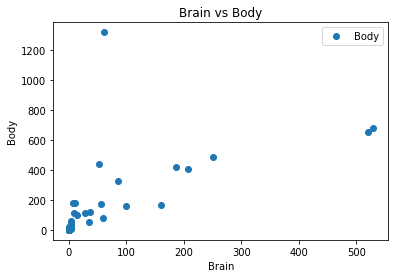

In [ ]:
df.plot(x="Brain",y="Body",style='o')
plt.title("Brain vs Body")
plt.xlabel("Brain")
plt.ylabel("Body")
plt.show()

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.655901
Body,0.655901,1.000000


In [ ]:
X = df.loc[:,["Brain"]].values
y = df.loc[:,["Body"]].values

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test) 

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8374538920777662
